# Value at Risk Model

[*********************100%***********************]  1 of 1 completed


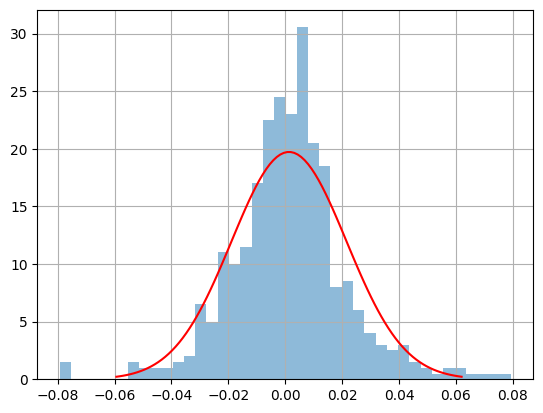

In [1]:
# We will import the necessary libraries

import numpy as np
import pandas as pd
import yfinance as yf
from tabulate import tabulate

# Plotting
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab

#Statistical calculation
from scipy.stats import norm

# We will import the daily data of Amazon from yahoo finance
# Calculate daily returns
df = yf.download("AMZN", "2020-01-01", "2022-01-01")
# df = df[['Close']]
df['returns'] =  df.Close.pct_change()


# Now we will determine the mean and standard deviation of the daily returns 
# Plot the normal curve against the daily returns

mean = np.mean(df['returns'])
std_dev = np.std(df['returns'])

df['returns'].hist(bins=40, density=True, histtype='stepfilled', alpha=0.5)

x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x,norm.pdf(x, mean, std_dev),"r")
plt.show()

In [ ]:
# Var At Various Confidence Intervals using Variance/Covariance Approach
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)
print (tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers = ['Confidence Level', 'Value at Risk (%)']))